In [ ]:
import pandas as pd
from IPython.display import display, Markdown
from trend_analysis import (
    load_data,
    cluster_topics,
    get_top_terms_per_cluster,
    plot_trends_over_time,
    name_and_describe_clusters,
    merge_similar_clusters
)



### Topic 118
**Keywords**: yummy, yum, youre, youd, yo, yesterday, yessssss, yesssss, yessss, yesss
**Name**: Yummy / Yum
**Summary**: Comments related to 'yummy / yum', based on frequent word usage.


### Topic 285
**Keywords**: treehut, pr, yummy, yum, youre, youd, yo, yesterday, yessssss, yesssss
**Name**: Treehut / Pr
**Summary**: Comments related to 'treehut / pr', based on frequent word usage.


### Topic 291
**Keywords**: hut, tree, pr, yum, youre, youd, yo, yesterday, yessssss, yesssss
**Name**: Hut / Tree
**Summary**: Comments related to 'hut / tree', based on frequent word usage.


### Topic 49
**Keywords**: treehut, yummy, yum, youre, youd, yo, yesterday, yessssss, yesssss, yessss
**Name**: Treehut / Yummy
**Summary**: Comments related to 'treehut / yummy', based on frequent word usage.


### Topic 60
**Keywords**: need, hello, yum, youre, youd, yo, yesterday, yessssss, yesssss, yessss
**Name**: Need / Hello
**Summary**: Comments related to 'need / hello', based on frequent word usage.


### Topic 323
**Keywords**: fools, april, joke, isnt, better, wasnt, hope, real, lol, dont
**Name**: Fools / April
**Summary**: Comments related to 'fools / april', based on frequent word usage.


### Topic 2
**Keywords**: love, vanilla, yummy, yum, youre, youd, yo, yesterday, yessssss, yesssss
**Name**: Love / Vanilla
**Summary**: Comments related to 'love / vanilla', based on frequent word usage.


### Topic 284
**Keywords**: treehutpr, yummy, yum, youre, youd, yo, yesterday, yessssss, yesssss, yessss
**Name**: Treehutpr / Yummy
**Summary**: Comments related to 'treehutpr / yummy', based on frequent word usage.


### Topic 279
**Keywords**: treehut, pr, yummy, yum, youre, youd, yo, yesterday, yessssss, yesssss
**Name**: Treehut / Pr
**Summary**: Comments related to 'treehut / pr', based on frequent word usage.

c:\Users\nicol\python_script\scrollmark\trend_analysis.py:90: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


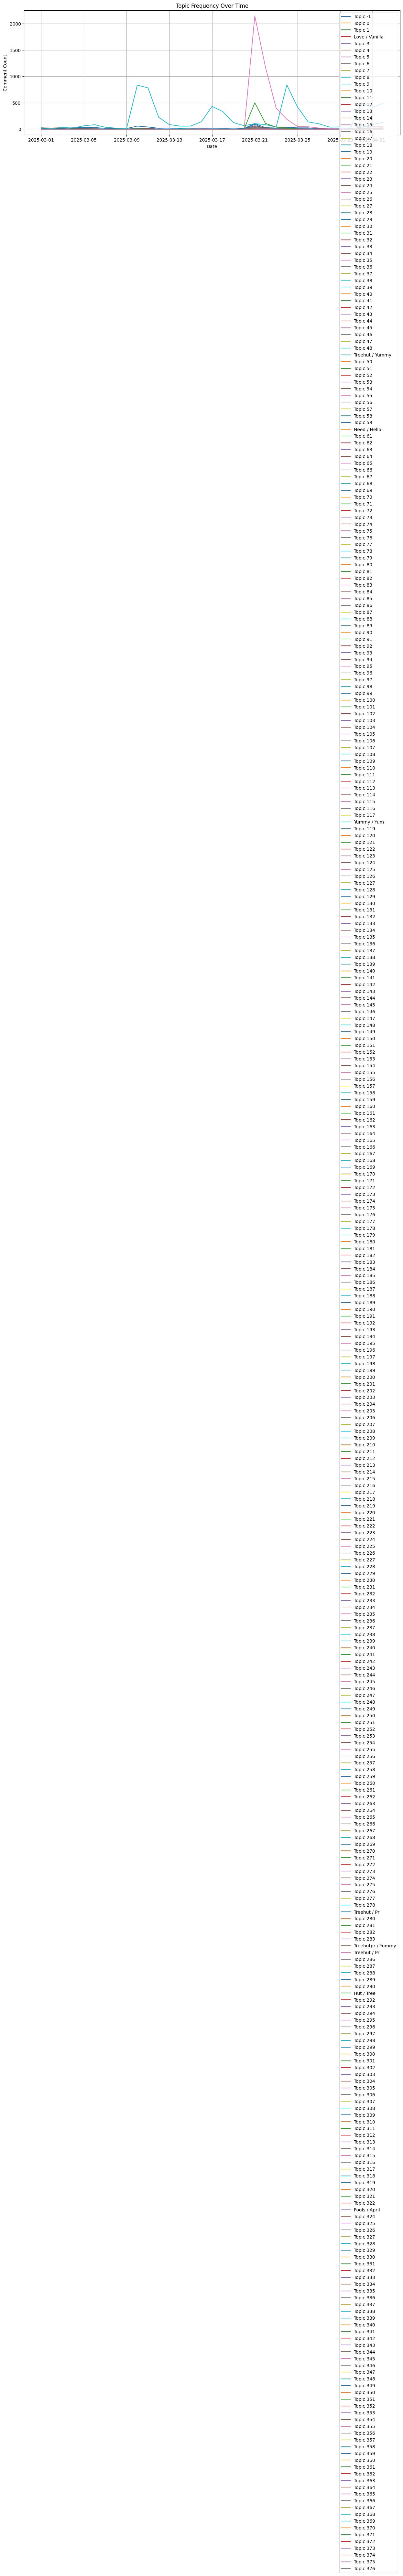

In [ ]:
# Load and preprocess data
df = load_data("engagements.csv")

# Cluster topics using DBSCAN + TSNE
df, clusterer, tfidf = cluster_topics(df, 'comment_text')

# Extract keywords per cluster
tfidf_matrix = tfidf.transform(df['clean_text'])
df['cluster'] = merge_similar_clusters(tfidf_matrix, df['cluster'].values)
keywords = get_top_terms_per_cluster(tfidf_matrix, df['cluster'].values, tfidf, max_clusters=10)

# Get topic names and summaries (without LLM)
summaries, names = name_and_describe_clusters(keywords)

# Display summaries
for s in summaries:
    display(Markdown(s))

# Plot topic trends
plot_trends_over_time(df, cluster_names=names)